Exercise 1

It can be seen that since the wave form is centered around a single axis line in the original, removing the mean and then normalizing the audio will not cause much difference in the wave forms, except for the values being different and playback will sound differently due to the new values.

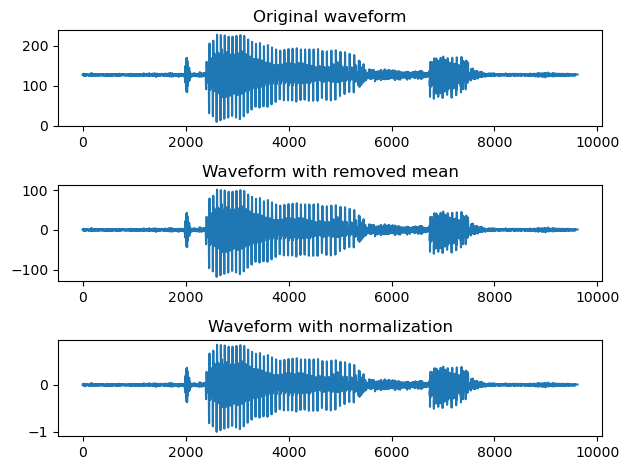

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt


Fs, y = wavfile.read('./Kuusi.wav')

#Remove mean from  all values of y
import numpy as np
yremovedmean = y - np.mean(y)


#Normalize y to -1..1
ynormalized = yremovedmean / np.max(np.abs(yremovedmean))


#Plot the waveform
figure, axis = plt.subplots(3, 1)

axis[0].plot(y)
axis[0].set_title('Original waveform')

axis[1].plot(yremovedmean)
axis[1].set_title('Waveform with removed mean')

axis[2].plot(ynormalized)
axis[2].set_title('Waveform with normalization')
plt.tight_layout()
plt.show()

Exercise 2
Using librosa and downsampling the audio from 8kHz to 1kHz in increments of 1kHz, the audio gets less clear each time with the "s" in "kuusi" being the deciding factor for whether the audio is intelligible or not. The "s" sound was unintelligble starting from 1kHz to 4kHz sampling rate. From the plotted waveforms, the biggest difference between untelligible and intelligible waveforms is that the difference between the peaks and the majority of where the waveform is much bigger. This makes sense since the "s" sound gets less clear going from 8 to 1kHz which has a higher pitch than most other sounds.

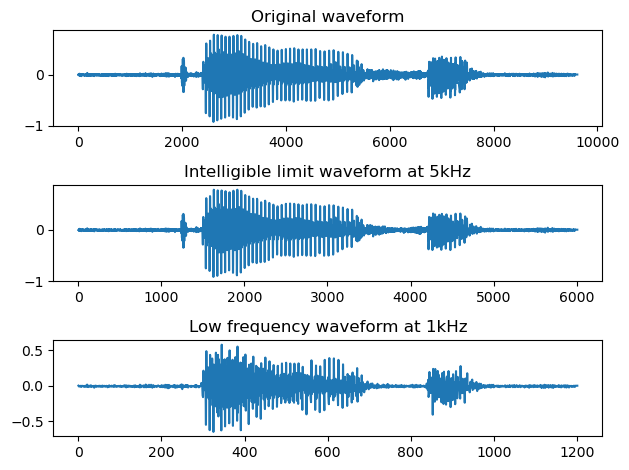

In [29]:
import librosa 
import sounddevice as sd
   
for i in range(1, 9):
    y, sr = librosa.load('./Kuusi.wav', sr=i*1000) #downsample to i*1000 Hz
    sd.play(y, sr)
    sd.wait()
    
intelligiblelimit,sr1 = librosa.load('./Kuusi.wav', sr=5000)
original,sr2 = librosa.load('./Kuusi.wav', sr=8000)
low,sr3 = librosa.load('./Kuusi.wav', sr=1000)

#Plot the waveform
figure, axis = plt.subplots(3, 1)

axis[0].plot(original)
axis[0].set_title('Original waveform')

axis[1].plot(intelligiblelimit)
axis[1].set_title('Intelligible limit waveform at 5kHz')

axis[2].plot(low)
axis[2].set_title('Low frequency waveform at 1kHz')
plt.tight_layout()
plt.show()

Exercise 3
1. There seems to be more changes in skewness and kurtosis in regions where there is more activity i.e. when there is spoken words. Short window shows the activity clearer than the long window which makes sense since short windows disects the audio into more parts than the long window.

2. The bigger the value of the window, the clearer it can be seen that the skewness spikes where voice acitivity starts which also makes sense. After silence, voice activity will introduce lots of skew to the data after long silence, but constantly talking will not introduce as much skew compared to voice that is already "talking".

Increasing the window also produces spikes in kurtosis and skewness only in regions that have actual voice acitivity.

We try to produce smoother energy curves to lessen the effects of noise that seem important when they are actually not.

3. Skewness measures how much the data leans to a single side (or how asymmetric the data is), while kurtosis measures how much of the data is concentrated in the "tails" of the produced plots.

Because many statistical methods and machine learning algorithms assume normally distributed data, skewness and kurtosis lets the supervisor of the machine learning knows the deviation of data from normality, and to correct or adapt for such deviation.

Python's moment function calculate a dataset's moments. These moments tell the characteristics of a dataset's distribution. The first moment describes the location, the second - its variance, etc. The higher the moment of the dataset, the more general of the shape is being described. For example, since kurtosis is a more general description than skewness because it is a higher moment.





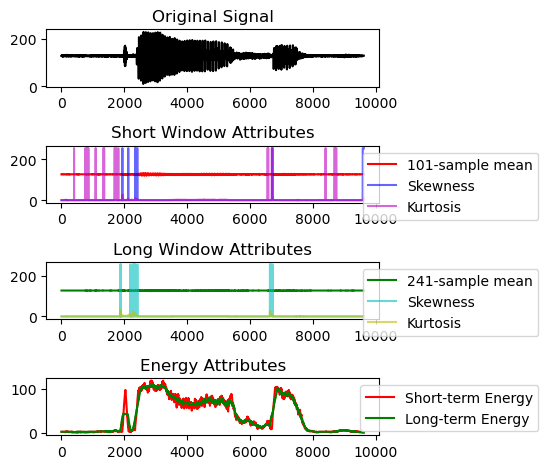

In [89]:
#average_filter.py

import numpy as np
from numpy import cos, sin, pi, absolute, arange, mean
from matplotlib import pyplot as plt
from scipy.stats import skew,kurtosis
from scipy.io import wavfile


data,y = wavfile.read('./Kuusi.wav') #read the wav file


len1=50 #length of the average filter (trend) (1+2*len)=window size
len2=120 #longer trend (1+2*len2)

x  = y.copy()*0   # short mean
x2 = y.copy()*0   # long mean
x3 = y.copy()*0   # short skew
x4 = y.copy()*0   # long skew
x5 = y.copy()*0   # short kurtosis
x6 = y.copy()*0   # long kurtosis
energy1 = y.copy()*0  # short energy
energy2 = y.copy()*0  # long energy
for i in range(len(y)):
	start=i-len1
	if start<1: #for initializing the window
		start=1
	start2=i-len2
	if start2<1: #for initializing the window2
		start2=1

	ending=i+len1    
	if ending>len(y):   #taking care of the 
		ending=len(y)	#end of the window

	ending2=i+len2    
	if ending2>len(y):  #taking care of the 
		ending2=len(y) 	#end of the window2

	if len(y[start:ending])<2:
		x[i]=0
	else:
		x[i]=np.mean(y[start:ending])  #sliding window mean
		x3[i]=skew(y[start:ending],axis=0, bias=True)
		x5[i]=kurtosis(y[start:ending],axis=0, bias=True)
		energy1[i]=np.sum(y[start:ending]**2)/(ending-start) #short term energy

	if len(y[start2:ending2])<2:
		x2[i]=0
	else:
		x2[i]=np.mean(y[start2:ending2]) #sliding window mean
		x4[i]=skew(y[start2:ending2],axis=0, bias=True)
		x6[i]=kurtosis(y[start2:ending2],axis=0, bias=True)
		energy2[i]=np.sum(y[start2:ending2]**2)/(ending2-start2)




figure, axis = plt.subplots(4, 1)

# Plot 1: Original signal
axis[0].plot(y, 'k')
axis[0].set_title("Original Signal")

# Plot 2: Short window attributes
axis[1].plot(x, 'r', label=f'{2*len1+1}-sample mean')
axis[1].plot(x3, 'b', alpha=0.6, label='Skewness')
axis[1].plot(x5, 'm', alpha=0.6, label='Kurtosis')
axis[1].legend(bbox_to_anchor=(1.5, 1), loc='upper right')
axis[1].set_title("Short Window Attributes")

# Plot 3: Long window attributes
axis[2].plot(x2, 'g', label=f'{2*len2+1}-sample mean')
axis[2].plot(x4, 'c', alpha=0.6, label='Skewness')
axis[2].plot(x6, 'y', alpha=0.6, label='Kurtosis')
axis[2].legend(bbox_to_anchor=(1.5, 1), loc='upper right')
axis[2].set_title("Long Window Attributes")

# Plot 4: Energy
axis[3].plot(energy1, 'r', label='Short-term Energy')
axis[3].plot(energy2, 'g', label='Long-term Energy')
axis[3].legend(bbox_to_anchor=(1.5, 1), loc='upper right')
axis[3].set_title("Energy Attributes")

plt.tight_layout()
plt.show()

Exercise 3: Amazon data

Starting the window size at 5 seems to produce a smoother looking energy curve

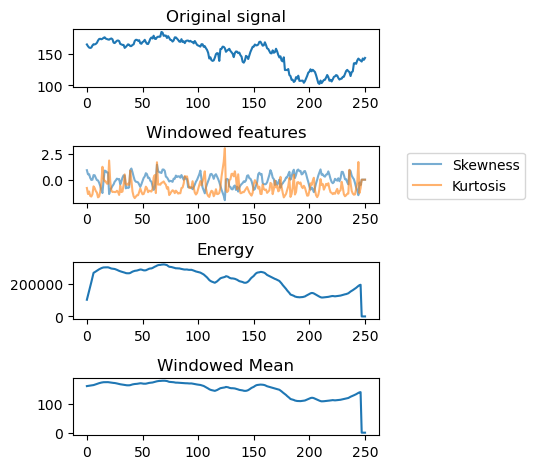

In [88]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew,kurtosis
import pickle

with open("AMZN.pkl", "rb") as f:
    amazon = pickle.load(f)


selected = amazon['Close'].values #get the values as numpy array


windowlen = 5 #length of the average filter (trend) (1+2*len)=window size
windowmean = selected.copy()*0
skew1 = selected.copy()*0
kurt = selected.copy()*0
energy = selected.copy()*0

for i in range(len(selected)):
	start=i-windowlen
	if start<1: #for initializing the window
		start=1
	ending=i+windowlen
 
	if ending>len(selected):
		ending=len(selected)
	else:
		windowmean[i] = np.mean(selected[start:ending])
		skew1[i] = skew(selected[start:ending],axis=0, bias=True)
		kurt[i] = kurtosis(selected[start:ending],axis=0, bias=True)
		energy[i] = np.sum(selected[start:ending]**2)



figure, axis = plt.subplots(4, 1)



axis[0].plot(selected)
axis[0].set_title('Original signal')


axis[1].plot(skew1, alpha=0.6)
axis[1].plot(kurt, alpha=0.6)
axis[1].legend(['Skewness', 'Kurtosis'],bbox_to_anchor=(1.5, 1), loc='upper right')
axis[1].set_title('Windowed features')

axis[2].plot(energy)
axis[2].set_title('Energy')

axis[3].plot(windowmean)
axis[3].set_title('Windowed Mean')
plt.tight_layout()
plt.show()



Exercise 4:
1)	What is your own opinion about machine learning, what does it contain?
Machine learning not only contains many different types of algorithms (probabilistic, (non)parametric, ...) that learn from previous data to predict the behavior of unseen data with little to no human intervention. Machine learning can be used on a variety of data, whether they are big or small or multi-dimensional, as long as they can be put into numbers that be processed by algorithms.

2)	Why are the neural networks having so dominant role in machine learning?
A majority of a neural network's network can be left untouched (because most of it is hidden) and it can still learn the data whether there is a small or large amount of it, so it doesn't require as much attention as other mechanisms.

3)	Why there are so many architectures in neural networks?
Different kind of data kind have different attributes, e.g. data from images has different dimensions from that of sound or text, so different architectures with advantages adapted to such differences are needed to better fit the machine learning to a dataset's attribute.

4)	How is the architecture decided?
The archiecture may be decided depending on the data's dimensions, task of the learning results (prediction, classification, etc.), size of dataset being inputed, among other things.
